In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
# Uploading the data
from google.colab import files
uploaded = files.upload()

Saving Customers.csv to Customers.csv


In [ ]:
# Getting data into dataframe
df = pd.read_csv('Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [ ]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [ ]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()






In [ ]:
# Select only numerical features for scaling
numerical_features = df.select_dtypes(include=np.number).columns
df_numerical = df[numerical_features]

scaler = StandardScaler()
scaler.fit(df_numerical)
df_scaled = scaler.transform(df_numerical)

In [ ]:
df_scaled

array([[-1.731185  , -1.05408932, -2.09350095, -0.42833854, -0.79120713,
         0.11749744],
       [-1.72945295, -0.98372287, -1.65613312,  1.07554599, -0.28116224,
        -0.39005088],
       [-1.7277209 , -1.0189061 , -0.54084515, -1.6099621 , -0.79120713,
        -1.40514752],
       ...,
       [ 1.7277209 ,  1.33836975, -0.43235606, -1.3235079 ,  1.24897242,
        -0.8975992 ],
       [ 1.72945295,  0.98653753,  1.56090408, -1.68157565,  0.73892753,
        -0.8975992 ],
       [ 1.731185  ,  1.44391941, -0.00266404,  0.03714953,  0.22888264,
        -0.8975992 ]])

In [ ]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:


In [ ]:
range(1,4)

range(1, 4)

In [ ]:
for i in range(1,4):
  kmeans = KMeans(n_clusters=i,random_state=42)
  kmeans.fit(df_scaled)
  print (i)

1
2
3


In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


In [ ]:
wcss

[12000.000000000015,
 10040.831736650782,
 8996.057996044347,
 8184.512266791675,
 7648.549843791984,
 7064.430487738437,
 6655.926136314039,
 6331.647145719737,
 6047.859151163593,
 5849.235608597995]

In [ ]:
# Plot

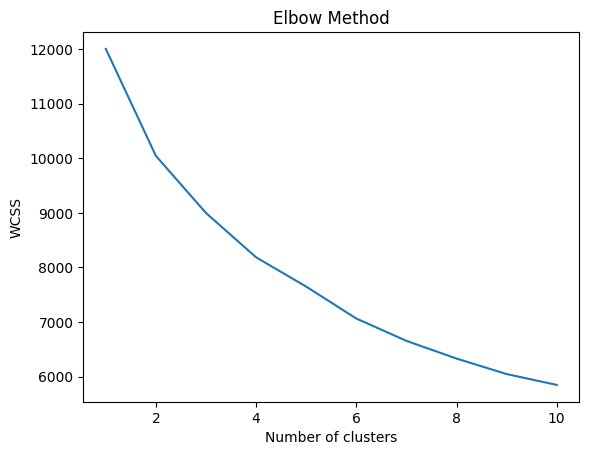

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(df_scaled)

KMeans(n_clusters=4, random_state=42)

In [ ]:
clusters_new.labels_

array([2, 2, 2, ..., 1, 1, 0], dtype=int32)

In [ ]:
#Assign clusters to the data set
Cust['clusterid_new'] = clusters_new.labels_

In [ ]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.40975539,  0.77237028,  0.02001847, -0.11438155, -0.3351002 ,
         0.82655845],
       [ 0.45068133, -0.16499256,  0.37097959, -0.11323892,  1.20914034,
        -0.11645817],
       [-1.17035576, -0.16323211, -1.08573935, -0.090546  , -0.30132428,
        -0.4811493 ],
       [ 0.19286462, -0.5412262 ,  0.64652089,  0.34931115, -0.66914511,
        -0.34016366]])

In [ ]:
Cust.head(15)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,clusterid_new
0,1,Male,19,15000,39,Healthcare,1,4,2
1,2,Male,21,35000,81,Engineer,3,3,2
2,3,Female,20,86000,6,Engineer,1,1,2
3,4,Female,23,59000,77,Lawyer,0,2,2
4,5,Female,31,38000,40,Entertainment,2,6,2
5,6,Female,22,58000,76,Artist,0,2,2
6,7,Female,35,31000,6,Healthcare,1,3,2
7,8,Female,23,84000,94,Healthcare,1,3,2
8,9,Male,64,97000,3,Engineer,0,3,2
9,10,Female,30,98000,72,Artist,1,4,2


In [ ]:
Cust[Cust['clusterid_new']==3]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,clusterid_new
273,274,Female,18,143000,99,Artist,0,2,3
286,287,Female,85,140000,84,Entertainment,1,1,3
300,301,Male,85,153787,100,Entertainment,3,3,3
302,303,Female,31,145015,73,Healthcare,6,3,3
306,307,Female,63,165052,12,Artist,4,2,3
...,...,...,...,...,...,...,...,...,...
1944,1945,Male,19,129635,100,Artist,6,4,3
1945,1946,Male,29,133587,74,Marketing,5,3,3
1950,1951,Male,42,68765,69,Entertainment,4,1,3
1958,1959,Male,73,142502,97,Doctor,5,1,3


In [ ]:
Cust[Cust['clusterid_new']==1]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,clusterid_new
55,56,Male,47,95000,41,Artist,14,2,1
305,306,Female,65,180243,26,Marketing,6,2,1
308,309,Male,26,112766,83,Engineer,8,4,1
318,319,Male,66,182937,44,Marketing,8,1,1
321,322,Male,5,69078,60,Lawyer,13,1,1
...,...,...,...,...,...,...,...,...,...
1992,1993,Male,94,181183,24,Marketing,9,3,1
1993,1994,Female,64,175254,100,Artist,9,5,1
1994,1995,Female,19,54121,89,Engineer,6,3,1
1997,1998,Male,87,90961,14,Healthcare,9,2,1


In [ ]:
Cust[Cust['clusterid_new']==2]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,clusterid_new
0,1,Male,19,15000,39,Healthcare,1,4,2
1,2,Male,21,35000,81,Engineer,3,3,2
2,3,Female,20,86000,6,Engineer,1,1,2
3,4,Female,23,59000,77,Lawyer,0,2,2
4,5,Female,31,38000,40,Entertainment,2,6,2
...,...,...,...,...,...,...,...,...,...
1183,1184,Female,62,73419,14,Healthcare,0,1,2
1231,1232,Female,41,61355,13,Healthcare,1,3,2
1259,1260,Male,47,52152,17,Artist,0,3,2
1286,1287,Female,18,62651,13,Entertainment,0,2,2
